In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

import neuraltda.stimulus_space as ss
import neuraltda.pyslsa_environments as penv

/home/alex/DailyLog/20180605/


In [2]:
L = 2 # meter
v = 0.1

hole_rad = 0.3
nsecs = 40*60
fs = 10
ncells = 100
ntrials = 1

max_rate_hz = 4 # spikes/ second
sigma = 0.1

max_hole = 5
nrepeats = 1
exclusion_param = 1.05 # how far away centers of pfs must be as a multiple of hole radius. 

windt = 100.0
thresh = 6.0
period = [0,0]
dtovr = 5.0

In [3]:
test = penv.EnvironmentSimulation(L, v, hole_rad, nsecs, fs, ncells, ntrials, max_rate_hz, sigma, max_hole, nrepeats, exclusion_param)

Generating environments...
Generating Place Fields...
Generating spikes...
Steps to go: 20000
Steps to go: 10000
Steps to go: 20000
Steps to go: 10000
Steps to go: 20000
Steps to go: 10000
Steps to go: 20000
Steps to go: 20000
Steps to go: 10000
Steps to go: 20000
Steps to go: 10000
Steps to go: 10000
Steps to go: 10000
Steps to go: 10000


In [4]:
test.compute_simplicial_complexes(windt, dtovr, thresh)

Binning data...
Nreps = 1
skip = 1
dur = 24000.0
nwins = 24000
Computing simplicial complexes...
Binning data...
Nreps = 1
skip = 1
dur = 24000.0
nwins = 24000
Computing simplicial complexes...
Binning data...
Nreps = 1
skip = 1
dur = 24000.0
nwins = 24000
Computing simplicial complexes...
Binning data...
Nreps = 1
skip = 1
dur = 24000.0
nwins = 24000
Computing simplicial complexes...
Binning data...
Nreps = 1
skip = 1
dur = 24000.0
nwins = 24000
Computing simplicial complexes...


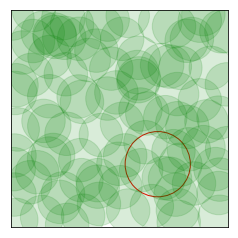

In [5]:
env_num = 1
penv.plot_environment(test.envs[env_num], test.fields, test.sigmaL)

In [6]:
test.mds_embed(env_num, False)

In [7]:
test.fit_affine()

Optimization terminated successfully.
         Current function value: 195.001216
         Iterations: 823
         Function evaluations: 1294


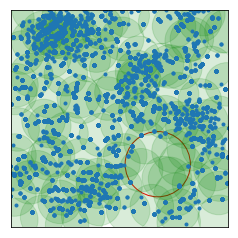

In [8]:
fig = plt.figure(figsize=(9,9))
penv.plot_environment(test.envs[env_num], test.fields, test.sigmaL)
plt.plot(test.y_embed[0, :], test.y_embed[1, :], '.');

In [9]:
test.mds_embed(env_num, True)

In [10]:
test.fit_affine()

Optimization terminated successfully.
         Current function value: 395.874169
         Iterations: 716
         Function evaluations: 1131


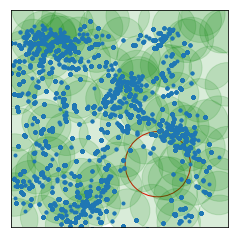

In [11]:
fig = plt.figure(figsize=(9,9))
penv.plot_environment(test.envs[env_num], test.fields, test.sigmaL)
plt.plot(test.y_embed[0, :], test.y_embed[1, :], '.');